<a href="https://colab.research.google.com/github/PattarapornH/Crab-Molting-Detection/blob/master/Molting_crab_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
path_dir = 'gdrive/My Drive/Year4/Project/top_view/Case10_2018_09_29_Coor(5_2)/'

path = []

for p in os.listdir(path_dir):
  # print(p)
  path.append(p)

path.sort()
path[0:10]

['21-20-05.png',
 '21-20-15.png',
 '21-20-25.png',
 '21-20-35.png',
 '21-20-45.png',
 '21-20-55.png',
 '21-21-05.png',
 '21-21-15.png',
 '21-21-25.png',
 '21-21-35.png']

In [0]:
from google.colab.patches import cv2_imshow

def plot_img(image):
  # shape = image.shape
  # img_resize = cv.resize(image,(int(shape[1]/2),int(shape[0]/2)))
  cv2_imshow(image)

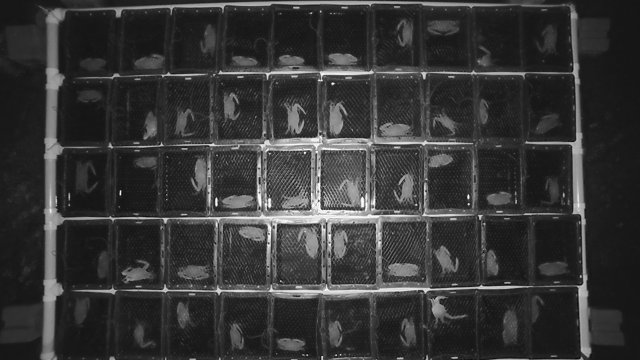

In [5]:
import cv2 as cv

data = []

for p in path:
  img = cv.imread(path_dir+'/'+p)
  shape = img.shape
  img_resize = cv.resize(img,(int(shape[1]/2),int(shape[0]/2)))
  data.append(img_resize)

plot_img(data[0])
# data[0].shape

In [6]:
data[0].shape

(360, 640, 3)

# Equalize Histogram

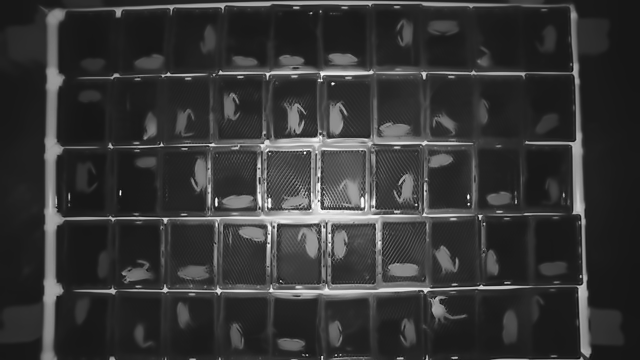

In [7]:
img = cv.fastNlMeansDenoisingColored(data[0],None,10,10,7,21)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plot_img(gray)

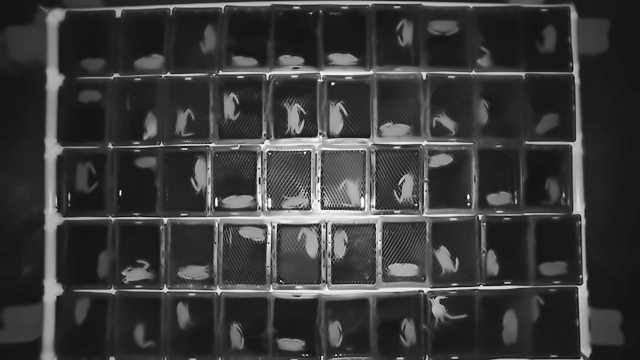

In [8]:
clahe = cv.createCLAHE(clipLimit=1.0, tileGridSize=(9,9))
cl1 = clahe.apply(gray)
plot_img(cl1)

(array([1.0000e+00, 5.0000e+00, 1.0000e+00, 3.0000e+00, 5.0000e+00,
        1.0000e+00, 3.0000e+00, 1.6000e+01, 3.6000e+01, 3.2990e+03,
        6.0580e+03, 8.6440e+03, 1.1243e+04, 1.2926e+04, 5.7410e+03,
        0.0000e+00, 1.1456e+04, 9.8790e+03, 4.4500e+03, 8.5570e+03,
        3.5640e+03, 7.2300e+03, 3.5610e+03, 7.7220e+03, 3.8980e+03,
        7.3410e+03, 3.3840e+03, 3.0850e+03, 6.6050e+03, 3.4040e+03,
        3.4300e+03, 0.0000e+00, 3.2890e+03, 6.0210e+03, 2.8320e+03,
        2.5750e+03, 2.4730e+03, 2.2800e+03, 4.0330e+03, 1.7920e+03,
        1.7890e+03, 1.4750e+03, 1.4620e+03, 1.4800e+03, 1.3740e+03,
        1.2880e+03, 1.2690e+03, 0.0000e+00, 1.1620e+03, 1.1380e+03,
        1.1570e+03, 1.1530e+03, 1.1240e+03, 1.1020e+03, 1.0810e+03,
        1.0050e+03, 8.9400e+02, 9.6400e+02, 9.1700e+02, 8.9800e+02,
        9.4800e+02, 8.9800e+02, 8.4100e+02, 0.0000e+00, 8.4200e+02,
        0.0000e+00, 9.3100e+02, 8.6300e+02, 8.2000e+02, 8.7300e+02,
        8.7600e+02, 7.8400e+02, 0.0000e+00, 8.07

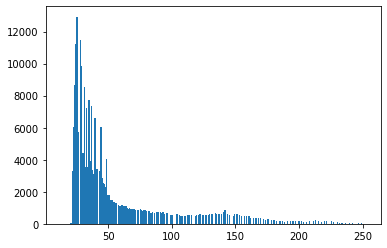

In [9]:
plt.hist(gray.flatten(),bins = 255)

In [0]:
template = cv.imread('gdrive/My Drive/Year4/Project/template_light.JPG')
img = cv.fastNlMeansDenoisingColored(template,None,10,10,7,21)
temp = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plot_img(temp)

img_rgb = np.array(data[0])
res = cv.matchTemplate(gray,temp,cv.TM_CCORR_NORMED)
threshold = 0.8
w, h = temp.shape[0],temp.shape[1]

loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,0), 1)
plot_img(img_rgb)

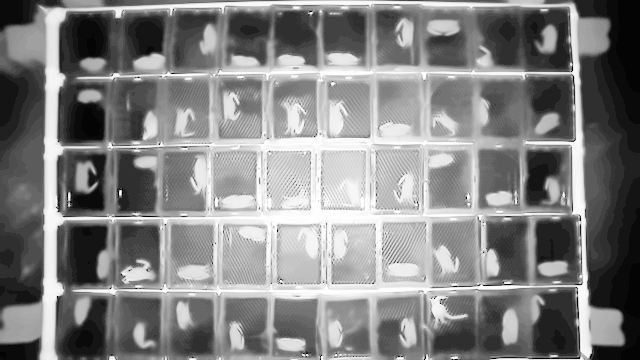

In [10]:
eq = cv.equalizeHist(gray)
plot_img(eq)

In [0]:
eq.shape

(360, 640)

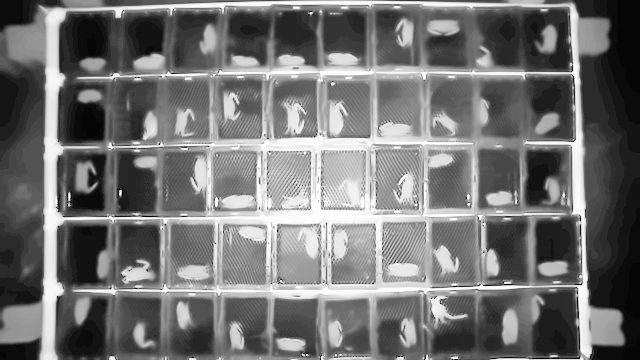

In [0]:
clahe = cv.createCLAHE(clipLimit=1.0, tileGridSize=(5,5))
cl1 = clahe.apply(eq)
plot_img(cl1)

In [0]:
max_in = np.max(cl1)
min_in = np.min(cl1)
new = np.empty([360,640])
for i in range(cl1.shape[0]):
  for j in range(cl1.shape[1]):
    new[i,j] = ((cl1[i,j]-min_in)/(max_in-min_in))*255


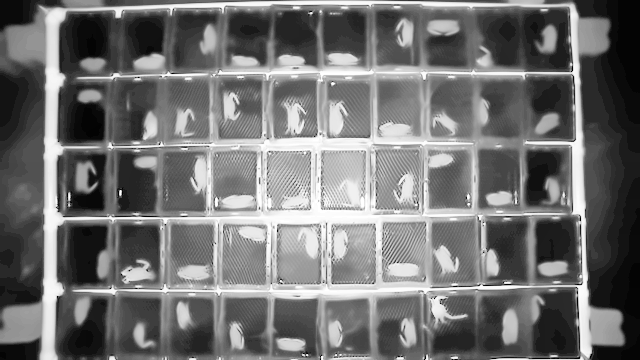

In [0]:
plot_img(new)

.............................................................
complete


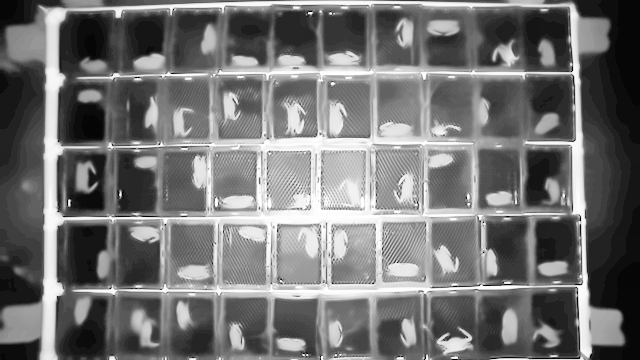

In [7]:
clean_data = []

for i in range(len(data)):
  print('.',end='')
  img = cv.fastNlMeansDenoisingColored(data[i],None,10,10,7,21)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  eq = cv.equalizeHist(gray)
  clahe = cv.createCLAHE(clipLimit=1.0, tileGridSize=(5,5))
  cl1 = clahe.apply(eq)
  clean_data.append(cl1)

print('\ncomplete')
plot_img(clean_data[60])

.............................................................

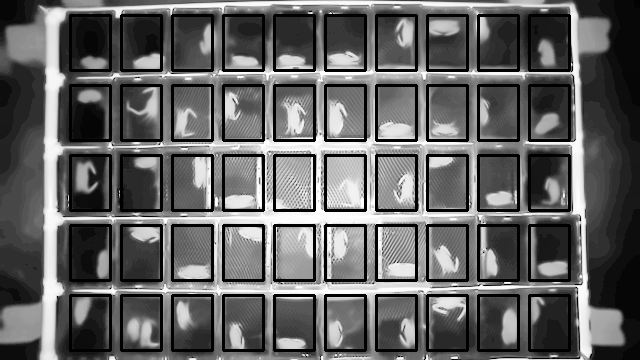

In [42]:
rect = []
series = dict()

START_X = 70
START_Y = 15
WIDTH = 40
HEIGHT = 55
DELTA_X = 51
DELTA_Y = 70
pos = ['A','B','C','D','E']

def draw_rect(img,time_series):
  for i in range(10):
    for j in range(5):
      x = START_X+(DELTA_X*i)
      y = START_Y+(DELTA_Y*j)
      cv.rectangle(img,(x,y),(x+WIDTH,y+HEIGHT),(0,255,0),2)
      if(pos[j]+str(i+1) not in time_series):
        time_series[pos[j]+str(i+1)] = [(img[y:y+HEIGHT,x:x+WIDTH],)]
      else:
        time_series[pos[j]+str(i+1)].append((img[y:y+HEIGHT,x:x+WIDTH],))

for i in range(len(clean_data)):
  print('.',end='')
  tmp = np.array(clean_data[i])
  draw_rect(tmp,series)
  rect.append(tmp)
plot_img(rect[47])

In [0]:
# for key in series:
#   for i in range(len(series[key])):
#     if(np.mean(series[key][i][0]) > 70):
#       print(key,i)
#       break

In [0]:
# key = 'C5'
# series contain key(position) : [tuple(crop_img,theshold,mean),...,...]
for key in series:
  for i in range(len(series[key])):
    tmp = np.array(series[key][i][0])
    if(np.mean(tmp) > 35):
      tmp = cv.convertScaleAbs(tmp, alpha=1, beta=-(np.mean(tmp)-35))
    bll = cv.medianBlur(tmp,5)
    _, th1 = cv.threshold(bll, 100, 255,cv.THRESH_BINARY)
    series[key][i]  = series[key][i] + (th1,np.mean(th1))
  # print('key: {0}, mean: {1} {3}, index: {2}'.format(key,series[key][i][2],i,np.mean(th1)))
  # plot_img(series[key][i][0])
  # plot_img(bll)
  # plot_img(th1)

In [0]:
time_series = dict()

for key in series:
  for i in range(len(series[key])-1):
    diff = np.count_nonzero(series[key][i+1][1] - series[key][i][1])
    if(key not in time_series):
      time_series[key] = [diff]
    else:
      time_series[key].append(diff)

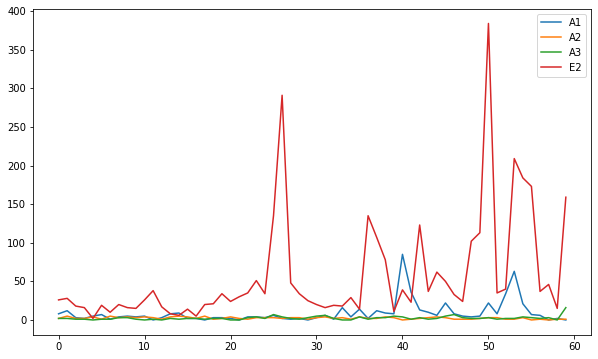

In [55]:
plt.figure(figsize=(10,6))
# for key in time_series:
#   plt.plot(time_series[key],label=key)
plt.plot(time_series['A1'],label='A1')
plt.plot(time_series['A2'],label='A2')
plt.plot(time_series['A3'],label='A3')
plt.plot(time_series['E2'],label='E2')
plt.legend()


# Dilation & Inpaint

In [0]:
clean_data = []
# denoise --> convert to grayscale --> dilate --> theshold --> 
# inpaint --> blur --> gamma
for i in range(len(data)):
  print('.',end='')
  img = cv.fastNlMeansDenoisingColored(data[i],None,10,10,7,21)
  gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  kernel = np.ones((5,5),np.uint8)
  dilation = cv.dilate(gray,kernel,iterations=1)
  _, th1 = cv.threshold(dilation, np.mean(dilation)+2.5*np.std(dilation), np.max(dilation),cv.THRESH_BINARY)
  paint = cv.inpaint(gray,th1,3,cv.INPAINT_TELEA)
  blur = cv.medianBlur(paint, 3)
  # gamma correction
  gamma = 1.5
  invGamma = 1.0 / gamma
  table = np.array([((i / 255.0) ** invGamma) * 255
    for i in np.arange(0, 256)]).astype("uint8")
  # apply gamma correction using the lookup table
  x = cv.LUT(blur, table)
  clean_data.append(x)

print('\ncomplete')

.............................................................
complete


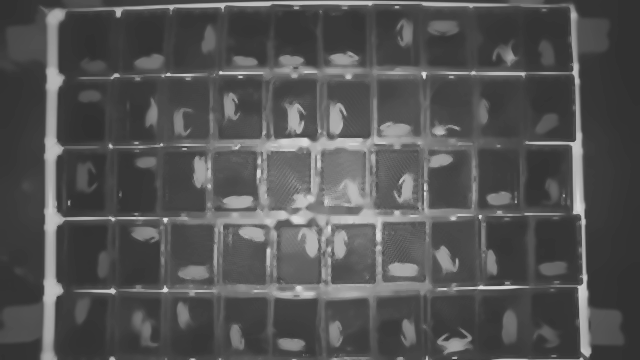

In [0]:
img = cv.fastNlMeansDenoisingColored(data[60],None,10,10,7,21)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(gray,kernel,iterations=1)
_, th1 = cv.threshold(dilation, np.mean(dilation)+2.5*np.std(dilation), np.max(dilation),cv.THRESH_BINARY)
paint = cv.inpaint(gray,th1,3,cv.INPAINT_TELEA)
blur = cv.medianBlur(paint, 3)
# gamma correction
gamma = 1.5
invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255
  for i in np.arange(0, 256)]).astype("uint8")
# apply gamma correction using the lookup table
x = cv.LUT(blur, table)
plot_img(x)

61


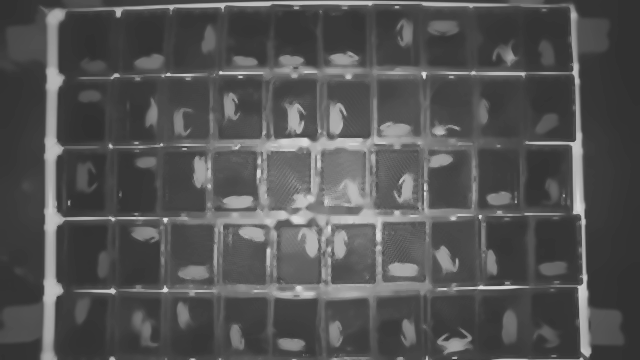

In [0]:
print(len(clean_data))
plot_img(clean_data[60])

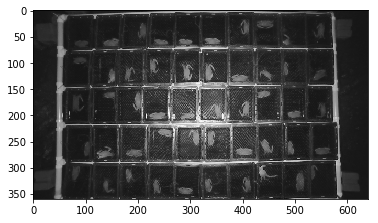

In [0]:
# plt.figure(figsize=(360,640))
plt.imshow(data[0])

(360, 640, 3)


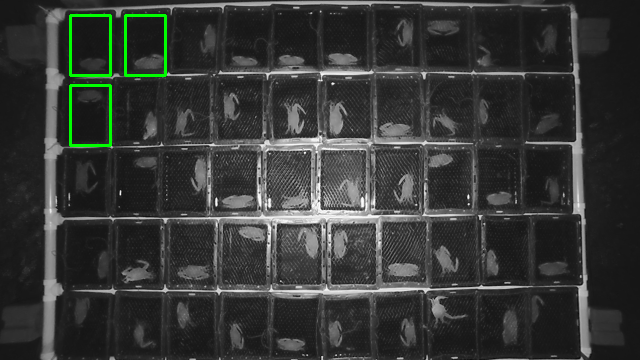

In [0]:
tmp = np.array(data[0])
cv.rectangle(tmp,(70,15),(110,75),(0,255,0),2)
cv.rectangle(tmp,(125,15),(165,75),(0,255,0),2)
cv.rectangle(tmp,(70,85),(110,145),(0,255,0),2)

print(tmp.shape)
plot_img(tmp)
# width = 40, height = 60
# delta x = 15, delta y = 10

In [0]:
rect = []
START_X = 70
START_Y = 15
WIDTH = 40
HEIGHT = 55
DELTA_X = 51
DELTA_Y = 70
pos = ['A','B','C','D','E']

crop = np.empty((5,10))
series = dict()

def draw_rect(img,time):
  for i in range(10):
    for j in range(5):
      x = START_X+(DELTA_X*i)
      y = START_Y+(DELTA_Y*j)
      if(pos[j]+str(i+1) not in time):
        time[pos[j]+str(i+1)] = [img[y:y+HEIGHT,x:x+WIDTH]]
      else:
        time[pos[j]+str(i+1)].append(img[y:y+HEIGHT,x:x+WIDTH])
      cv.rectangle(img,(x,y),(x+WIDTH,y+HEIGHT),(0,255,0),2)

for i in range(len(clean_data)):
  tmp = np.array(clean_data[i])
  draw_rect(tmp,series)
  rect.append(tmp)
# crop[0,0] = 18
# print(crop)

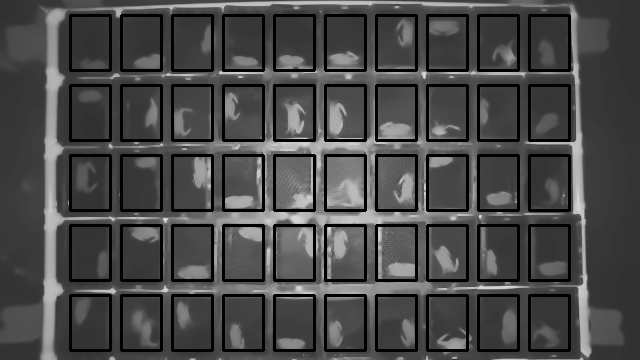

In [0]:
plot_img(rect[60])

ret 95.0
mean 16.69090909090909


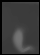

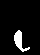

ret 94.0
mean 16.806818181818183


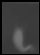

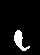

ret 93.0
mean 16.69090909090909


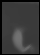

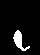

ret 94.0
mean 17.73409090909091


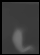

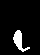

ret 94.0
mean 16.806818181818183


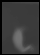

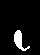

ret 94.0
mean 17.154545454545456


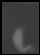

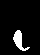

ret 94.0
mean 16.69090909090909


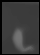

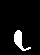

ret 94.0
mean 17.270454545454545


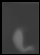

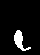

ret 94.0
mean 16.45909090909091


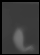

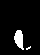

ret 95.0
mean 15.763636363636364


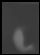

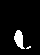

ret 93.0
mean 15.3


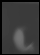

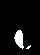

ret 94.0
mean 16.69090909090909


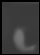

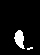

ret 94.0
mean 16.45909090909091


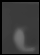

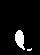

ret 95.0
mean 15.879545454545454


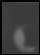

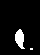

ret 95.0
mean 17.154545454545456


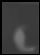

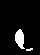

ret 95.0
mean 17.038636363636364


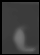

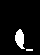

ret 95.0
mean 17.386363636363637


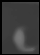

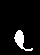

ret 95.0
mean 15.995454545454546


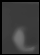

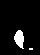

ret 96.0
mean 15.415909090909091


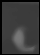

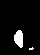

ret 95.0
mean 16.922727272727272


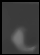

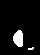

ret 97.0
mean 16.69090909090909


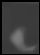

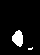

ret 98.0
mean 19.240909090909092


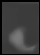

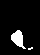

ret 99.0
mean 19.936363636363637


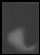

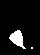

ret 100.0
mean 21.327272727272728


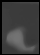

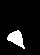

ret 101.0
mean 22.71818181818182


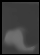

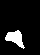

ret 101.0
mean 20.863636363636363


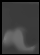

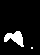

ret 101.0
mean 12.86590909090909


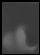

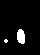

ret 100.0
mean 12.75


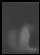

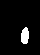

ret 100.0
mean 14.14090909090909


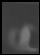

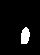

ret 100.0
mean 13.329545454545455


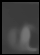

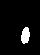

ret 100.0
mean 14.025


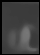

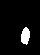

ret 101.0
mean 13.445454545454545


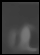

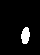

ret 99.0
mean 14.025


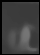

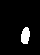

ret 100.0
mean 14.14090909090909


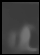

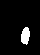

ret 101.0
mean 13.445454545454545


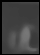

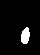

ret 100.0
mean 13.793181818181818


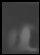

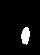

ret 100.0
mean 13.909090909090908


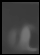

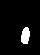

ret 101.0
mean 12.170454545454545


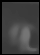

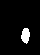

ret 101.0
mean 13.793181818181818


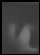

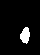

ret 102.0
mean 12.63409090909091


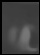

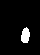

ret 101.0
mean 13.677272727272728


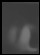

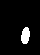

ret 102.0
mean 11.822727272727272


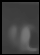

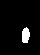

ret 100.0
mean 12.518181818181818


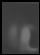

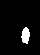

ret 106.0
mean 15.531818181818181


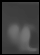

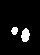

ret 105.0
mean 16.227272727272727


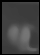

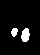

ret 106.0
mean 17.50227272727273


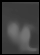

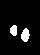

ret 105.0
mean 17.85


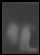

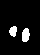

ret 105.0
mean 17.50227272727273


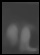

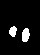

ret 105.0
mean 16.922727272727272


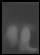

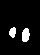

ret 104.0
mean 15.415909090909091


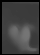

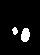

ret 106.0
mean 16.69090909090909


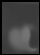

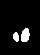

ret 107.0
mean 18.429545454545455


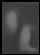

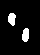

ret 106.0
mean 19.472727272727273


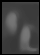

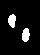

ret 106.0
mean 19.35681818181818


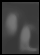

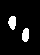

ret 107.0
mean 17.038636363636364


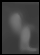

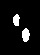

ret 107.0
mean 18.313636363636363


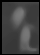

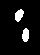

ret 106.0
mean 16.45909090909091


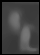

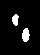

ret 105.0
mean 16.227272727272727


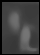

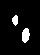

ret 102.0
mean 12.86590909090909


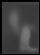

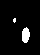

ret 102.0
mean 12.286363636363637


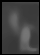

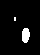

ret 106.0
mean 17.96590909090909


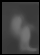

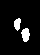

In [0]:
thres = []
for i in series['E2']:
  # np.mean(i)+2*np.std(i)
   _, th1 = cv.threshold(i, np.mean(i)+1.5*np.std(i), 255,cv.THRESH_BINARY)
   print('ret',_)
   print('mean',np.mean(th1))
   plot_img(i)
   plot_img(th1)
  #  thres.append(th1)

In [0]:
s = dict()

img = cv.fastNlMeansDenoisingColored(data[0],None,10,10,7,21)
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(gray,kernel,iterations=1)
_, th1 = cv.threshold(dilation, np.mean(dilation)+2.5*np.std(dilation), np.max(dilation),cv.THRESH_BINARY)
paint = cv.inpaint(gray,th1,3,cv.INPAINT_TELEA)
blur = cv.medianBlur(paint, 5)

draw_rect(blur,s)

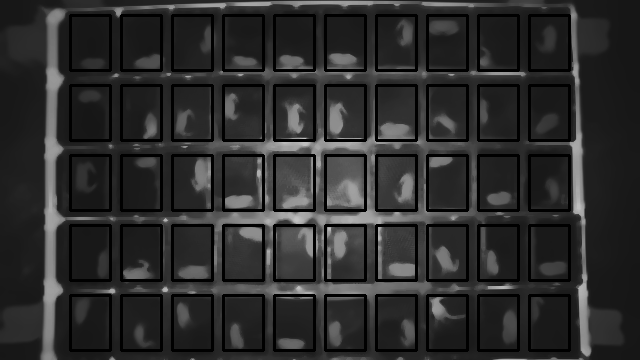

In [0]:
plot_img(blur)

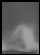

In [0]:
plot_img(s['C6'][0])

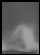

ret 154.0
mean 14.14090909090909


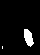

In [0]:
# gamma correction
gamma = 1
invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255
  for i in np.arange(0, 256)]).astype("uint8")
# apply gamma correction using the lookup table
x = cv.LUT(s['C6'][0], table)
plot_img(x)

# new_image = cv.convertScaleAbs(x, alpha=1.5, beta=40)
# plot_img(new_image)

ret, th1 = cv.threshold(x, np.mean(x)+1.5*np.std(x), 255,cv.THRESH_BINARY)
print('ret',ret)
print('mean',np.mean(th1))
plot_img(th1)


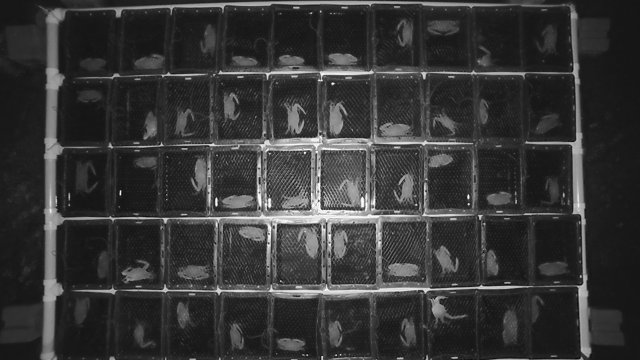

In [0]:
plot_img(data[0])

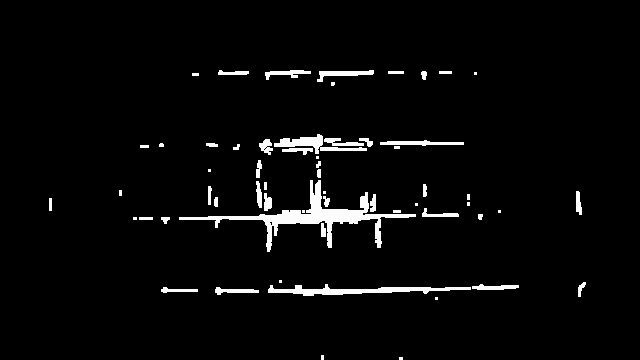

In [0]:
_, th1 = cv.threshold(dilation, np.mean(dilation)+2.5*np.std(dilation), np.max(dilation),cv.THRESH_BINARY)
plot_img(th1)

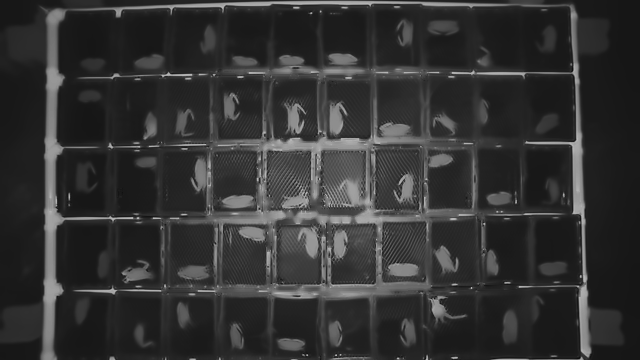

In [0]:
paint = cv.inpaint(gray,th1,3,cv.INPAINT_TELEA)
plot_img(paint)